# Titanic Disaster Survival Prediction

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data

In [2]:
titanic_data=pd.read_csv('train.csv')

### Viewing Data

In [3]:

titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


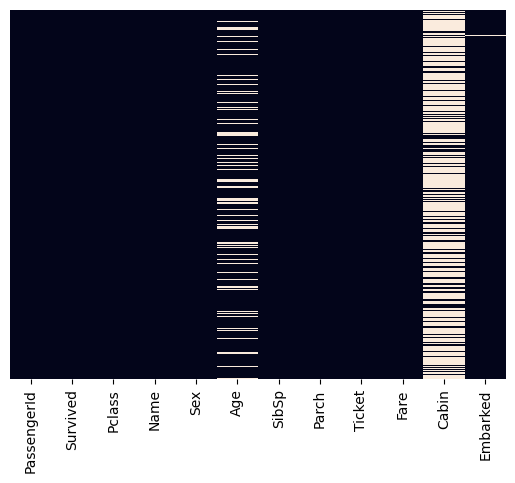

In [5]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)
plt.show()

In [6]:
null_values=titanic_data.isnull()
null_values.sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

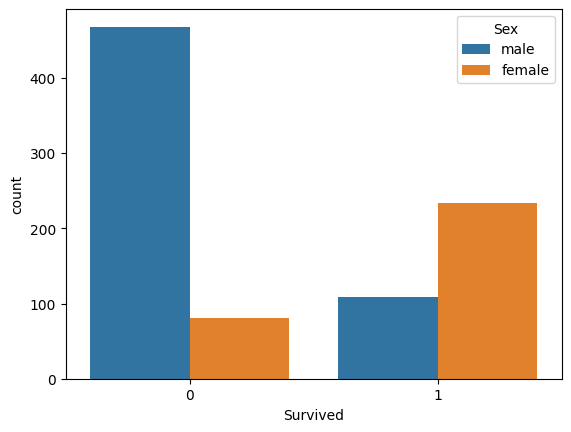

In [7]:
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


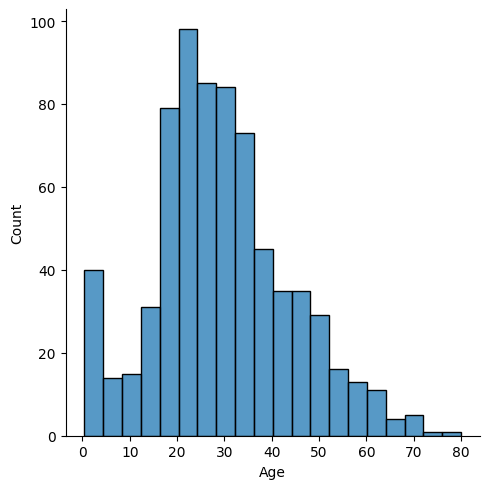

In [8]:
sns.displot(x='Age',data=titanic_data)

# Data Analysis

## Data Cleaning

#### As we saw the most of the data in Cabin was null; we can say that it did not had much effect on the passengers survived .
#### Therefore we are dropping the Cabin column

In [9]:
titanic_data.drop('Cabin',axis=1,inplace=True)

### Taking Care of misssing values

In [10]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [11]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Encoding categorical data

In [12]:
from sklearn.preprocessing import LabelEncoder
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)
le=LabelEncoder()
gender=le.fit_transform(gender)
titanic_data['Gender']=gender


c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


### Dropping non numerical columns

In [14]:
titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [15]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


## Splitting the dataset into the Training set and Test set

In [16]:
X=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
Y=titanic_data['Survived']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)



In [18]:
print(X)
X.isnull().sum()

     PassengerId  Pclass        Age  SibSp  Parch     Fare  Gender
0              1       3  22.000000      1      0   7.2500       1
1              2       1  38.000000      1      0  71.2833       0
2              3       3  26.000000      0      0   7.9250       0
3              4       1  35.000000      1      0  53.1000       0
4              5       3  35.000000      0      0   8.0500       1
..           ...     ...        ...    ...    ...      ...     ...
886          887       2  27.000000      0      0  13.0000       1
887          888       1  19.000000      0      0  30.0000       0
888          889       3  29.699118      1      2  23.4500       0
889          890       1  26.000000      0      0  30.0000       1
890          891       3  32.000000      0      0   7.7500       1

[891 rows x 7 columns]


PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

## Import & Fit Logistic  Regression 

In [19]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, Y_train)

c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
Y_pred=regressor.predict(X_test)
print(Y_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0]


# Predicting Data from our Training set


In [21]:
input_data = pd.DataFrame([[893, 3, 47, 1, 0, 7, 0]], columns=['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender'])

# Assuming 'regressor' is your trained model
prediction = regressor.predict(input_data)

print(prediction)

[1]


# Predicting Data From our test file

### Load Data

In [22]:
test_data=pd.read_csv('test.csv')

## Taking care of missing values

In [23]:
test_data.drop('Cabin',axis=1,inplace=True)

In [24]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

## Encoding categorical data

In [25]:
gender=pd.get_dummies(test_data['Sex'],drop_first=True)
le=LabelEncoder()
gender=le.fit_transform(gender)
test_data['Gender']=gender



c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Dropping non numerical columns

In [26]:
test_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [27]:
final_test_data=test_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
final_test_data.isnull().sum()


PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

# Using our Trained regressor model to predict test data

In [28]:

predictions = regressor.predict(test_data)

# Create a DataFrame to hold the results
results = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

print(results)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [29]:
results.to_csv("Final_predictions.csv",index=False)

In [30]:
from sklearn.metrics import accuracy_score
gs=pd.read_csv("gender_submission.csv")
y_gs_pred=gs['Survived']

accuracy = accuracy_score(y_gs_pred, predictions)

print("Accuracy:", accuracy)

Accuracy: 0.9545454545454546
